# Keras on MNIST
In this notebook, we showcase the effectiveness of Rational Activations on the MNIST image recognition task. After the neccessary imports, the dataset is transformed and created. The model will be a slightly modified VGG11 architecture to fit the input and output dimensions of the MNIST images.

In [1]:
from rational.utils.examples.keras import prepare_data_keras, compile_keras_model
from rational.utils.examples.plots import plot_grid
import numpy as np
import os

import matplotlib.pyplot as plt
from tensorflow.random import set_seed
plt.style.use('bmh')

### random seed, is tensorflow gpu deterministic?

In [2]:
seed = 4242
set_seed(seed)
np.random.seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

## Prepare the data generators and training hyperparameters
We apply featurewise normalization, a random rotation range of up to 30 degree and rescaling between 0 and 1 on the inputs. The inputs are reshaped to (32, 32). The outputs are converted into one-hot vectors.

In [3]:
epochs = 50
train_generator, test_generator = prepare_data_keras(seed=seed, batch_size=256)

/home/ml-jzimmermann/notebooks/venv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


### Compile and train the keras model using ReLU as activation function after the convolutional and linear layers:

In [4]:
model = compile_keras_model(rational=False)

history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, verbose=0)
relu_history = history.history

score = model.evaluate(test_generator, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss: 0.031866785138845444
Test accuracy: 0.9912999868392944


### Compile and train the keras model using Rational Activations after the convolutional and linear layers:

In [5]:
model = compile_keras_model(rational=True)

history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, verbose=0)
rational_history = history.history

score = model.evaluate(test_generator, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss: 0.02446925640106201
Test accuracy: 0.9926999807357788


### Plot the training and validation metrics:

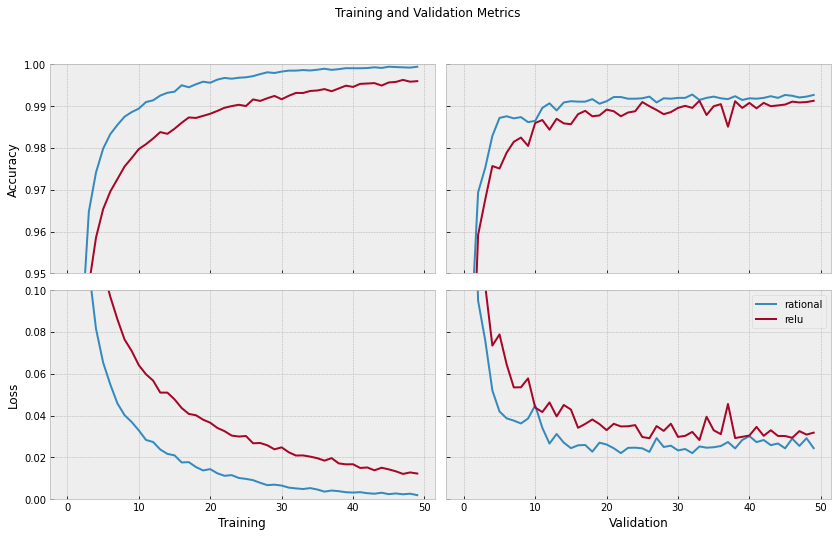

In [7]:
plot_grid({'rational': rational_history, 'relu': relu_history})